In [1]:
# Nạp các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<ipython-input-1-c321a74b6a58>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1. Mô hình số 01.

## 1.1. Lượng glucose tích luỹ hấp thụ từ đồ ăn.

Các đoạn code sau lần lượt là khai triển hàm tích luỹ hấp thụ từ đồ ăn và giải phương trình vi phân tương ứng trong phần 1.3.1 của báo cáo.

In [2]:
def G_food_01(G_food, G_food_max, t, alpha):
    if t <= 30:
        return 0
    return alpha * (G_food_max - G_food)

In [3]:
def heun_method(G_food_01, G_food_init, G_food_max, t_init, t_end, dt, alpha):
    t_values = np.arange(t_init, t_end, dt)
    G_food_values = np.zeros(len(t_values))
    G_food_values[0] = G_food_init
    
    for i in range(1, len(t_values)):
        t_n = t_values[i-1]
        G_food_n = G_food_values[i-1]
        
        # Bước dự đoán bằng phương pháp Euler đơn giản
        G_food_predict = G_food_n + dt * G_food_01(G_food_n, G_food_max, t_n, alpha)
        
        # Tính độ dốc tại thời điểm tiếp theo
        G_food_correct = G_food_n + (dt / 2) * (
            G_food_01(G_food_n, G_food_max, t_n, alpha) +
            G_food_01(G_food_predict, G_food_max, t_n + dt, alpha)
        )
        
        G_food_values[i] = G_food_correct
        
    return t_values, G_food_values

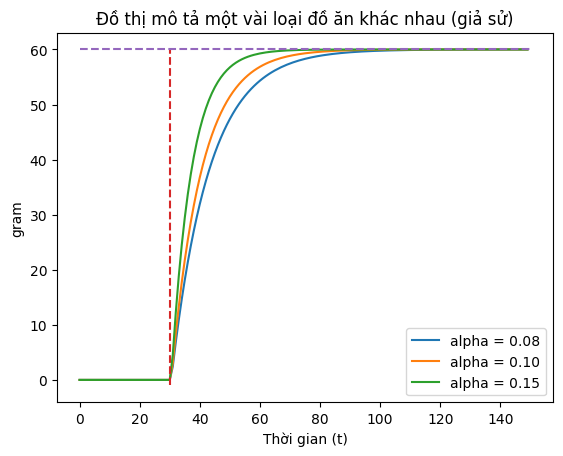

In [4]:
# Các tham số ban đầu
G_food_init = 0
G_food_max = 60
t_init = 0
t_end = 150
dt = 1.0

# Giải phương trình vi phân
t_values, G_food_values1 = heun_method(G_food_01, G_food_init, G_food_max, t_init, t_end, dt, 0.08)
t_values, G_food_values2 = heun_method(G_food_01, G_food_init, G_food_max, t_init, t_end, dt, 0.10)
t_values, G_food_values3 = heun_method(G_food_01, G_food_init, G_food_max, t_init, t_end, dt, 0.15)

# Vẽ đồ thị kết quả
plt.plot(t_values, G_food_values1, label='alpha = 0.08')
plt.plot(t_values, G_food_values2, label='alpha = 0.10')
plt.plot(t_values, G_food_values3, label='alpha = 0.15')
plt.plot([30, 30], [-1, 60], '--')
plt.plot([0, 150], [60, 60], '--')
plt.xlabel('Thời gian (t)')
plt.ylabel('gram')
plt.title('Đồ thị mô tả một vài loại đồ ăn khác nhau (giả sử)')
plt.legend()
plt.savefig('fig01.png')
plt.show()

## 1.2. Cơ chế cân bằng mức đường huyết của cơ thể.

Các đoạn code sau lần lượt là khai triển hệ phương trình mô tả sự cân bằng đường huyết của cơ thể và giải hệ phương trình vi phân tương ứng trong phần 1.3.1 của báo cáo.

In [5]:
# Định nghĩa hàm balancing_mechanism_01
def balancing_mechanism_01(G_food, G, I, H, G_food_01, G_food_max, alpha, t, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b):
    dG_dt = G_food_01(G_food, G_food_max, t, alpha) + g_out * G + g_i * I + g_h * H
    dI_dt = i_g * (G_b - G) + i_b * (I_b - I)
    dH_dt = h_g * (G_b - G) + h_b * (H_b - H)
    return dG_dt, dI_dt, dH_dt

In [6]:
# Định nghĩa hàm giải hệ phương trình bằng phương pháp Euler cải tiến
def heun_method_system(balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max, t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b):
    t_values = np.arange(t_init, t_end, dt)
    
    G_values = np.zeros(len(t_values))
    I_values = np.zeros(len(t_values))
    H_values = np.zeros(len(t_values))
    G_food_values = np.zeros(len(t_values))
    
    G_values[0] = G_init
    I_values[0] = I_init
    H_values[0] = H_init
    G_food_values[0] = G_food_init
    
    for i in range(1, len(t_values)):
        t_n = t_values[i-1]
        G_n = G_values[i-1]
        I_n = I_values[i-1]
        H_n = H_values[i-1]
        G_food_n = G_food_values[i-1]
        
        # Bước dự đoán
        dG_dt, dI_dt, dH_dt = balancing_mechanism_01(G_food_n, G_n, I_n, H_n, G_food_01, G_food_max, alpha, t_n, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b)
        
        G_predict = G_n + dt * dG_dt
        I_predict = I_n + dt * dI_dt
        H_predict = H_n + dt * dH_dt
        G_food_predict = G_food_n + dt * G_food_01(G_food_n, G_food_max, t_n, alpha)
        
        # Tính độ dốc tại thời điểm tiếp theo
        dG_dt_new, dI_dt_new, dH_dt_new = balancing_mechanism_01(G_food_predict, G_predict, I_predict, H_predict, G_food_01, G_food_max, alpha, t_n + dt, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b)
        
        # Điều chỉnh giá trị bằng cách lấy trung bình độ dốc
        G_values[i] = G_n + (dt / 2) * (dG_dt + dG_dt_new)
        I_values[i] = I_n + (dt / 2) * (dI_dt + dI_dt_new)
        H_values[i] = H_n + (dt / 2) * (dH_dt + dH_dt_new)
        G_food_values[i] = G_food_n + (dt / 2) * (G_food_01(G_food_n, G_food_max, t_n, alpha) + G_food_01(G_food_predict, G_food_max, t_n + dt, alpha))
    
    return t_values, G_food_values, G_values, I_values, H_values

In [7]:
# Các tham số ban đầu
G_food_init = 0
G_init = 75
I_init = 20
H_init = 25
G_food_max = 60
t_init = 0
t_end = 300
dt = 1.0
alpha = 0.1

# Các tham số bổ sung
G_b = 90
g_out = -0.0015
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028

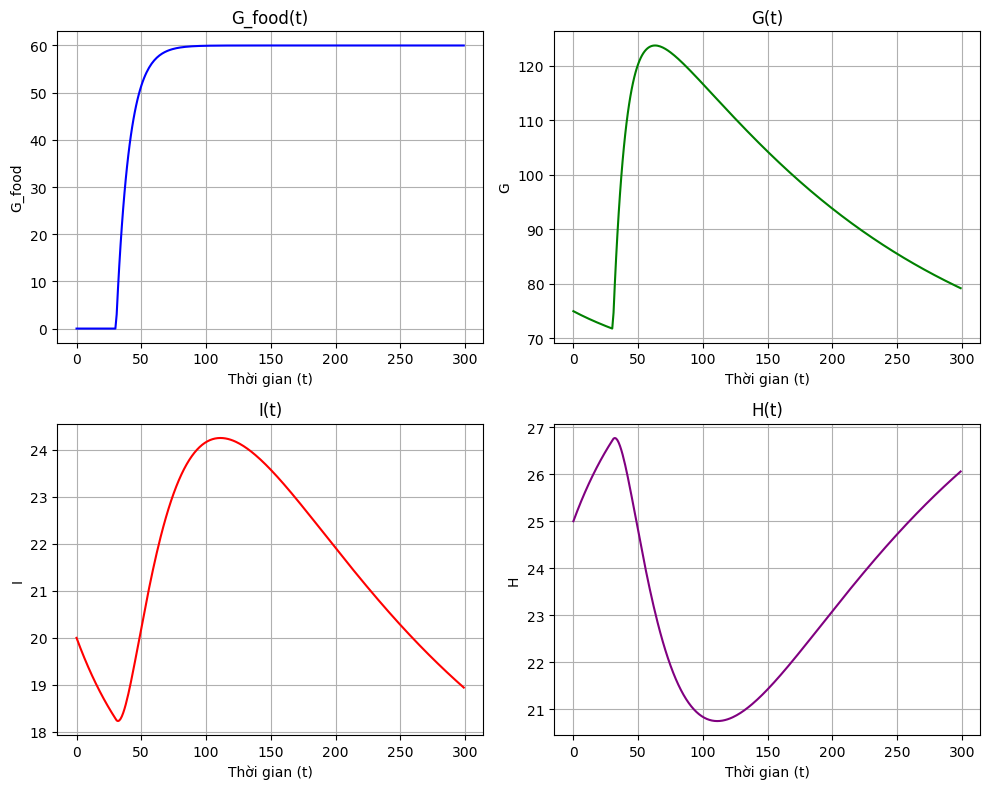

In [8]:
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

# Vẽ 4 biểu đồ thành 4 figure riêng biệt
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t_values, G_food_values, label='G_food(t)', color='blue')
plt.xlabel('Thời gian (t)')
plt.ylabel('G_food')
plt.title('G_food(t)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t_values, G_values, label='G(t)', color='green')
plt.xlabel('Thời gian (t)')
plt.ylabel('G')
plt.title('G(t)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t_values, I_values, label='I(t)', color='red')
plt.xlabel('Thời gian (t)')
plt.ylabel('I')
plt.title('I(t)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t_values, H_values, label='H(t)', color='purple')
plt.xlabel('Thời gian (t)')
plt.ylabel('H')
plt.title('H(t)')
plt.grid(True)

plt.savefig('[1.2] fig02.png')
plt.tight_layout()
plt.show()

## 1.3. Mô hình hoàn chỉnh.

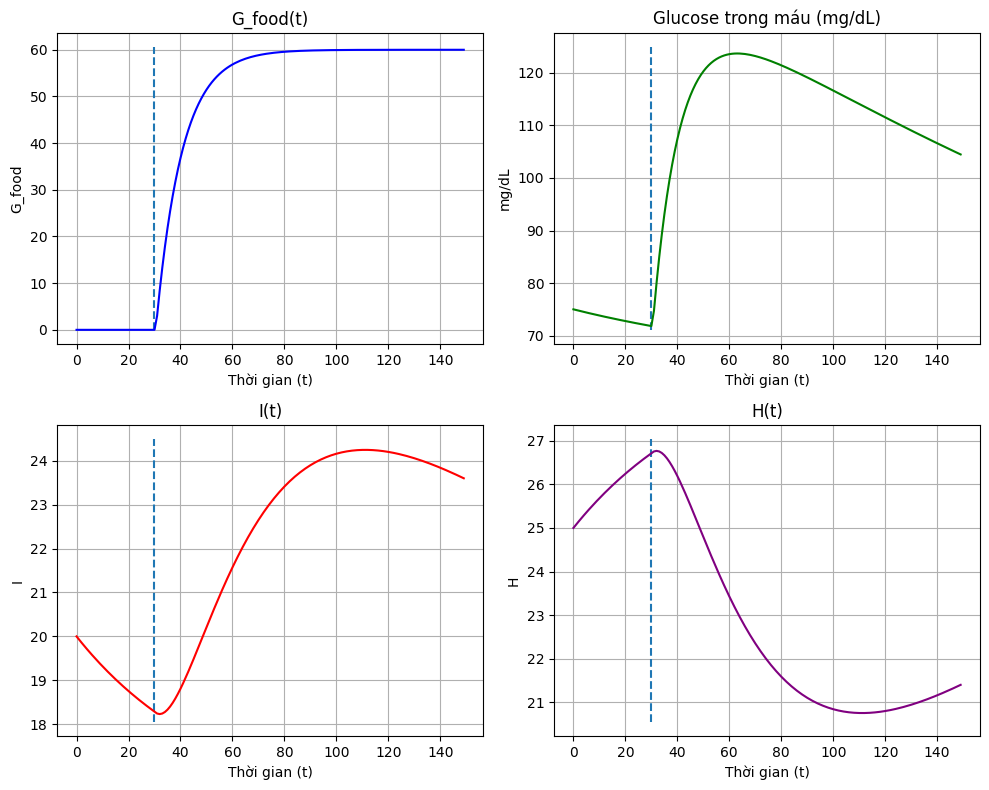

<Figure size 640x480 with 0 Axes>

In [17]:
# ============================================================
# Glucose tích luỹ từ đồ ăn
def G_food_01(G_food, G_food_max, t, alpha):
    if t <= 30:
        return 0
    return alpha * (G_food_max - G_food)

def heun_method(G_food_01, G_food_init, G_food_max, t_init, t_end, dt, alpha):
    t_values = np.arange(t_init, t_end, dt)
    G_food_values = np.zeros(len(t_values))
    G_food_values[0] = G_food_init
    
    for i in range(1, len(t_values)):
        t_n = t_values[i-1]
        G_food_n = G_food_values[i-1]
        
        # Bước dự đoán bằng phương pháp Euler đơn giản
        G_food_predict = G_food_n + dt * G_food_01(G_food_n, G_food_max, t_n, alpha)
        
        # Tính độ dốc tại thời điểm tiếp theo
        G_food_correct = G_food_n + (dt / 2) * (
            G_food_01(G_food_n, G_food_max, t_n, alpha) +
            G_food_01(G_food_predict, G_food_max, t_n + dt, alpha)
        )
        
        G_food_values[i] = G_food_correct
        
    return t_values, G_food_values
# =========================================================================================
# Cơ chế cân bằng glucose trong cơ thể

# Định nghĩa hàm balancing_mechanism_01
def balancing_mechanism_01(G_food, G, I, H, G_food_01, G_food_max, alpha, t, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b):
    dG_dt = G_food_01(G_food, G_food_max, t, alpha) + g_out * G + g_i * I + g_h * H
    dI_dt = i_g * (G_b - G) + i_b * (I_b - I)
    dH_dt = h_g * (G_b - G) + h_b * (H_b - H)
    return dG_dt, dI_dt, dH_dt

# Định nghĩa hàm giải hệ phương trình bằng phương pháp Euler cải tiến
def heun_method_system(balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max, t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b):
    t_values = np.arange(t_init, t_end, dt)
    
    G_values = np.zeros(len(t_values))
    I_values = np.zeros(len(t_values))
    H_values = np.zeros(len(t_values))
    G_food_values = np.zeros(len(t_values))
    
    G_values[0] = G_init
    I_values[0] = I_init
    H_values[0] = H_init
    G_food_values[0] = G_food_init
    
    for i in range(1, len(t_values)):
        t_n = t_values[i-1]
        G_n = G_values[i-1]
        I_n = I_values[i-1]
        H_n = H_values[i-1]
        G_food_n = G_food_values[i-1]
        
        # Bước dự đoán
        dG_dt, dI_dt, dH_dt = balancing_mechanism_01(G_food_n, G_n, I_n, H_n, G_food_01, G_food_max, alpha, t_n, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b)
        
        G_predict = G_n + dt * dG_dt
        I_predict = I_n + dt * dI_dt
        H_predict = H_n + dt * dH_dt
        G_food_predict = G_food_n + dt * G_food_01(G_food_n, G_food_max, t_n, alpha)
        
        # Tính độ dốc tại thời điểm tiếp theo
        dG_dt_new, dI_dt_new, dH_dt_new = balancing_mechanism_01(G_food_predict, G_predict, I_predict, H_predict, G_food_01, G_food_max, alpha, t_n + dt, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b)
        
        # Điều chỉnh giá trị bằng cách lấy trung bình độ dốc
        G_values[i] = G_n + (dt / 2) * (dG_dt + dG_dt_new)
        I_values[i] = I_n + (dt / 2) * (dI_dt + dI_dt_new)
        H_values[i] = H_n + (dt / 2) * (dH_dt + dH_dt_new)
        G_food_values[i] = G_food_n + (dt / 2) * (G_food_01(G_food_n, G_food_max, t_n, alpha) + G_food_01(G_food_predict, G_food_max, t_n + dt, alpha))
    
    return t_values, G_food_values, G_values, I_values, H_values

# Các tham số ban đầu
G_food_init = 0
G_init = 75
I_init = 20
H_init = 25
G_food_max = 60
t_init = 0
t_end = 150
dt = 1.0
alpha = 0.1

# Các tham số bổ sung
G_b = 90
g_out = -0.0015
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028

# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

# Vẽ 4 biểu đồ thành 4 figure riêng biệt
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot([30, 30], [np.min(G_food_values) * 0.99, np.max(G_food_values) * 1.01], '--')
plt.plot(t_values, G_food_values, label='G_food(t)', color='blue')
plt.xlabel('Thời gian (t)')
plt.ylabel('G_food')
plt.title('G_food(t)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, label='Glucose trong máu (mg/dL)', color='green')
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot([30, 30], [np.min(I_values) * 0.99, np.max(I_values) * 1.01], '--')
plt.plot(t_values, I_values, label='I(t)', color='red')
plt.xlabel('Thời gian (t)')
plt.ylabel('I')
plt.title('I(t)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot([30, 30], [np.min(H_values) * 0.99, np.max(H_values) * 1.01], '--')
plt.plot(t_values, H_values, label='H(t)', color='purple')
plt.xlabel('Thời gian (t)')
plt.ylabel('H')
plt.title('H(t)')
plt.grid(True)

plt.tight_layout()
plt.show()
plt.savefig('fig02.png')

## 1.4. Đo đạc dữ liệu thực tế.

### 1.4.1. Bệnh nhân số 09.

In [10]:
df = pd.read_csv("pratical_data.csv")
data_bar1 = df[df['Meal'] == 'Bar 1']
data_bar2 = df[df['Meal'] == 'Bar 2']
data_cf1 = df[df['Meal'] == 'CF 1']
data_cf2 = df[df['Meal'] == 'CF 2']
data_pd1 = df[df['Meal'] == 'PB 1']
data_pd2 = df[df['Meal'] == 'PB 2']

data_bar1.head(3)

,Meal,userID,time,GlucoseValue
0,Bar 1,2133-009,2016-11-22 08:15:00,113
1,Bar 1,2133-009,2016-11-22 08:20:00,107
2,Bar 1,2133-009,2016-11-22 08:25:00,107


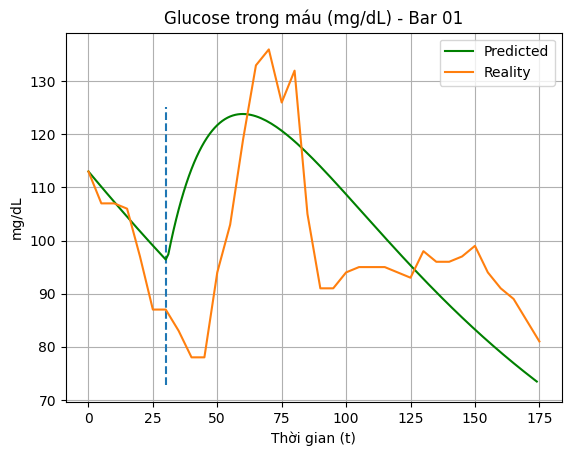

In [11]:
# Các tham số ban đầu
G_food_init = 0
G_init = 113 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.05 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(36)], data_bar1['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - Bar 01')
plt.grid(True)
plt.legend()
plt.savefig('bar1.png')

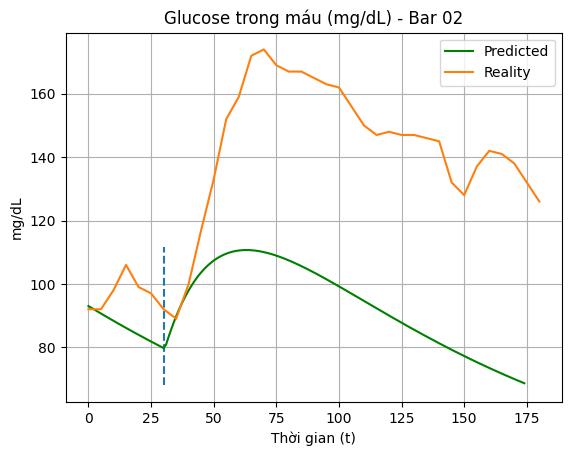

In [12]:
# Các tham số ban đầu
G_food_init = 0
G_init = 93 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.05 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(len(data_bar2))], data_bar2['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - Bar 02')
plt.grid(True)
data_bar2.head(3)
plt.legend()
plt.savefig('bar2.png')

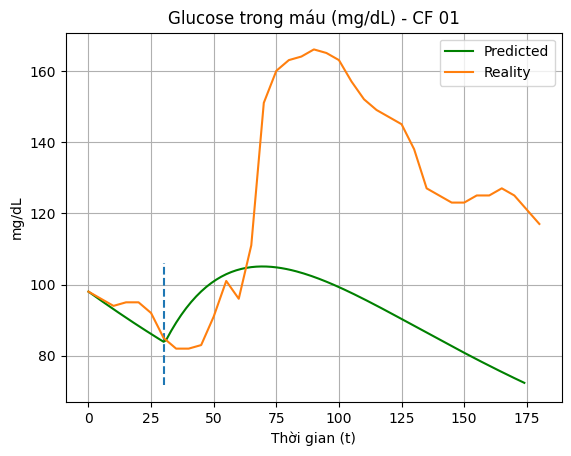

In [13]:
# Các tham số ban đầu
G_food_init = 0
G_init = 98 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.03 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(len(data_cf1))], data_cf1['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - CF 01')
plt.grid(True)
data_cf1.head(3)
plt.legend()
plt.savefig('cf1.png')

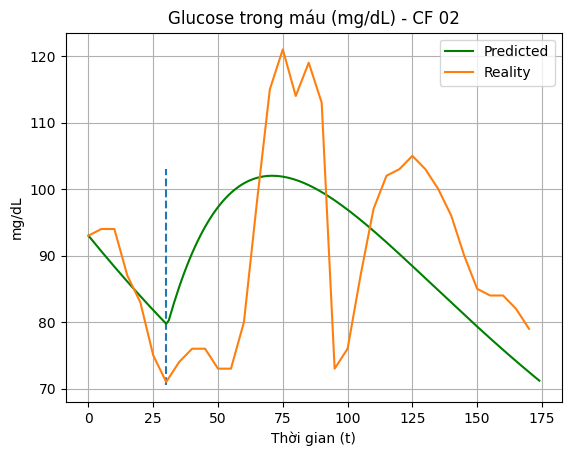

In [14]:
# Các tham số ban đầu
G_food_init = 0
G_init = 93 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.03 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(len(data_cf2))], data_cf2['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - CF 02')
plt.grid(True)
data_cf2.head(3)
plt.legend()
plt.savefig('cf2.png')

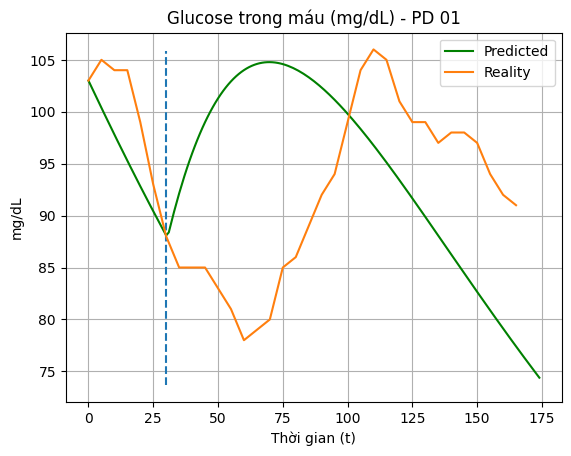

In [15]:
# Các tham số ban đầu
G_food_init = 0
G_init = 103 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.025 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(len(data_pd1))], data_pd1['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - PD 01')
plt.grid(True)
data_pd1.head(3)
plt.legend()
plt.savefig('pd1.png')

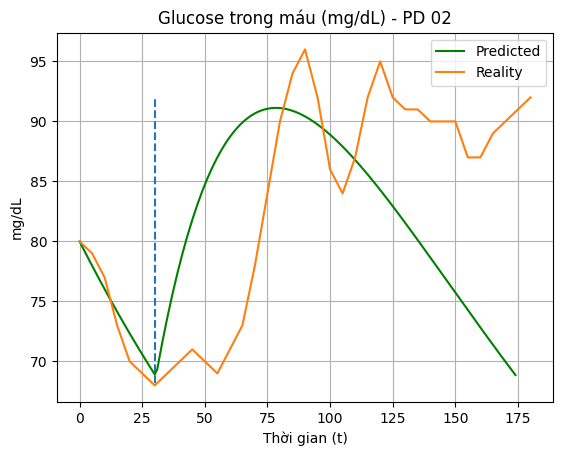

In [16]:
# Các tham số ban đầu
G_food_init = 0
G_init = 80 # Tham số có thể điều chỉnh
I_init = 20
H_init = 25
G_food_max = 60 # Tham số có thể điều chỉnh
t_init = 0
t_end = 175
dt = 1.0
alpha = 0.025 # Tham số có thể điều chỉnh

# Các tham số bổ sung
G_b = 90
g_out = -0.005 # Tham số có thể điều chỉnh
g_i = -0.01
g_h = 0.0075
I_b = 20
i_g = -0.005
i_b = 0.028
H_b = 25
h_g = 0.005
h_b = 0.028
# Giải hệ phương trình vi phân
t_values, G_food_values, G_values, I_values, H_values = heun_method_system(
    balancing_mechanism_01, G_food_init, G_init, I_init, H_init, G_food_max,
    t_init, t_end, dt, alpha, G_b, g_out, g_i, g_h, I_b, i_g, i_b, H_b, h_g, h_b
)

plt.plot([30, 30], [np.min(G_values) * 0.99, np.max(G_values) * 1.01], '--')
plt.plot(t_values, G_values, color='green', label = "Predicted")
plt.plot([i * 5 for i in range(len(data_pd2))], data_pd2['GlucoseValue'], label = "Reality")
plt.xlabel('Thời gian (t)')
plt.ylabel('mg/dL')
plt.title('Glucose trong máu (mg/dL) - PD 02')
plt.grid(True)
data_pd2.head(3)
plt.legend()
plt.savefig('pd2.png')